# Основы анализа данных в Python

*Алла Тамбовцева*

## Практикум 3.1. Обработка пропущенных значений и визуализация количественных данных

Файл `c.xlsx` содержит данные о рейтингах видео-игр по данным Metacritic. Набор данных содержит следующие переменные:

* `Name` – название игры.
* `Platform` – платформа для запуска игры.
* `Year_of_Release` – год запуска игры.
* `Genre` – жанр игры.
* `Publisher` – компания, выпустившая игру.
* `NA_Sales` – продажи в Северной Америке (миллионы копий).
* `EU_Sales` – продажи в Европейском Союзе (миллионы копий).
* `JP_Sales` – продажи в Японии (миллионы копий).
* `Other_Sales` – продажи в прочих странах (миллионы копий).
* `Global_Sales` – общие продажи по миру (миллионы копий).
* `Critic_Score` – агрегированный рейтинг команды Metacritic.
* `Critic_Count` – количество экспертов, участвовавших в расчёте `Critic_Score`.
* `User_Score` – агрегированный рейтинг пользователей Metacritic.
* `User_Count` – количество пользователей, участвовавших в расчёте `User_Score`.
* `Developer` – разработчик игры.
* `Rating` – рейтинг ESRB (Everyone, Teen, Adults Only, ...).

Импортируем библиотеку `pandas` с сокращённым названием:

In [1]:
import pandas as pd

Загрузим данные из файла:

In [2]:
games = pd.read_excel("c.xlsx")

Вспомним, как выглядит датафрейм:

In [3]:
# просто первые пять строк

games.head()

,Unnamed: 0,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# основные описательные статистики

games.describe()

,Unnamed: 0,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16719.000000,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,8359.000000,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,4826.503911,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,0.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,4179.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,8359.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,12538.500000,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,16718.000000,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


### Задача 1

Определите количество пропущенных значений признака, содержащих информацию о названиях разработчиков игр (переменная `Developer`). Выпишите найденное количество пропущенных значений.

Пример ответа: 100.00

In [6]:
# метод isna() возвращает столбец из True и False

games["Developer"].isna()

0        False
1         True
2        False
3        False
4         True
         ...  
16714     True
16715     True
16716     True
16717     True
16718     True
Name: Developer, Length: 16719, dtype: bool

In [7]:
# считаем сумму по столбцу (True = 1, False = 0)
# 6623.00 пойдет в ответ

games["Developer"].isna().sum()

6623

### Задача 2

Определите количество пропущенных значений признака, содержащих информацию о названиях разработчиков игр (переменная `Developer`). Замените пропущенные значения этого признака на моду по этому признаку и сохраните полученный признак без пропущенных значений в отдельную переменную, не включаемую в исходную таблицу. Выпишите количество значений этой переменной, равной ее моде.

Пример ответа: 100

In [8]:
# считаем моду
# так как мода может быть не одна
# (несколько значений с одинаково большой частотой)
# выдается не одно значение, а столбец из одного значения

games["Developer"].mode()

0    Ubisoft
dtype: object

In [9]:
# извлекаем из него один единственный элемент с индексом 0,
# так как нам нужно одно название компании (строка)

m = games["Developer"].mode()[0]
m

'Ubisoft'

In [10]:
# выполняем замену – метод fillna(), 
# внутри значение – чем заполняем пропуски NA (NaN)
# сохраняем результат в отдельную переменную filled

filled = games["Developer"].fillna(m)
filled

0        Nintendo
1         Ubisoft
2        Nintendo
3        Nintendo
4         Ubisoft
           ...   
16714     Ubisoft
16715     Ubisoft
16716     Ubisoft
16717     Ubisoft
16718     Ubisoft
Name: Developer, Length: 16719, dtype: object

In [11]:
# последний шаг
# считаем элементы в filled равные моде m
# filled == m возвращает столбец из True и False
# считаем сумму по столбцу (True = 1, False = 0)

(filled == m).sum()

6827

**ВАЖНО.** Чтобы графики точно отображались внутри ipynb-файла можно запустить «магическую строку» (*Jupyter magic*), это глобальные настройки для режима исполнения ячеек, содержащих код для построения графиков с помощью библиотеки `matplotlib` и ее производных (возможности внутри `pandas`, библиотека `seaborn`):

In [13]:
%matplotlib inline

### Задача 3

Постройте ящик с усами для агрегированного рейтинга команды Metacritic. Прокомментируйте полученное распределение. 

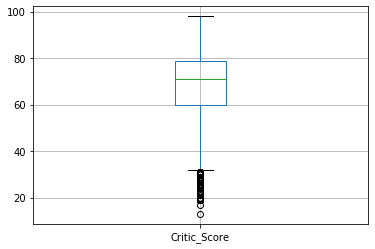

In [14]:
# сначала пишем название датафрейма,
# к нему применяем метод boxplot(), внутри – название столбца

# точка с запятой в конце – чтобы на экране была только картинка,
# без вспомогательных массивов

games.boxplot("Critic_Score");

**Интерпретация:** есть много выбросов снизу, то есть нетипично маленьких значений; распределение агрегированного рейтинга скошено слево.

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1420: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


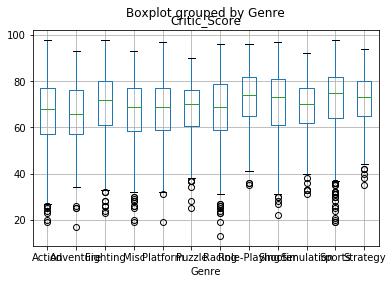

In [15]:
# бонус: одной строчкой можно и по группам ящики построить
# в аргумент by можно вписать показатель группировки

games.boxplot("Critic_Score", by = "Genre");

**Интерпретация:** 1) видно, что среди игр каждого жанра есть «провальные» игры с нетипично низким рейтингом; 2) максимально возможный рейтинг 100 из 100 не получила ни одна игра ни в одном жанре.


### Задача 4

Постройте гистограмму для агрегированного рейтинга команды Metacritic. Усовершенствуйте полученную гистограмму: 

* настройте цвет;
* добавьте подписи к осям;

Сделайте картинку размера 16 на 9 дюймов с разрешением 300 точек на дюйм и выгрузите в png-файл.

**Способ 1 (немного возможностей для настройки)** 

Используем метод `.hist()`, который применяется к **датафрейму** (в скобках в кавычках пишем название столбца, для которого строим график).

* `figsize`: размер в дюймах;
* `color`: цвет заливки;
* `edgecolor`: цвет границ столбцов.

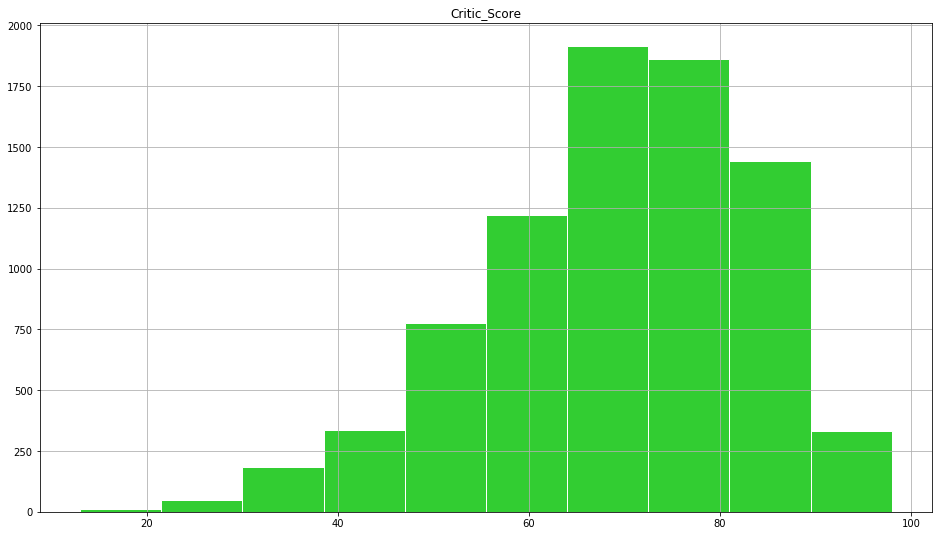

In [16]:
# способ 1
# не трогаем подписи к осям
# точка с запятой в конце – чтобы на экране была только картинка,
# без вспомогательных массивов

games.hist("Critic_Score", figsize = (16, 9), color = "limegreen", edgecolor = "white");

**Способ 2 (все еще немного возможностей для настройки)** 

Используем метод `.hist()`, который применяется к **столбцу** датафрейма, дополнительные параметры те же.

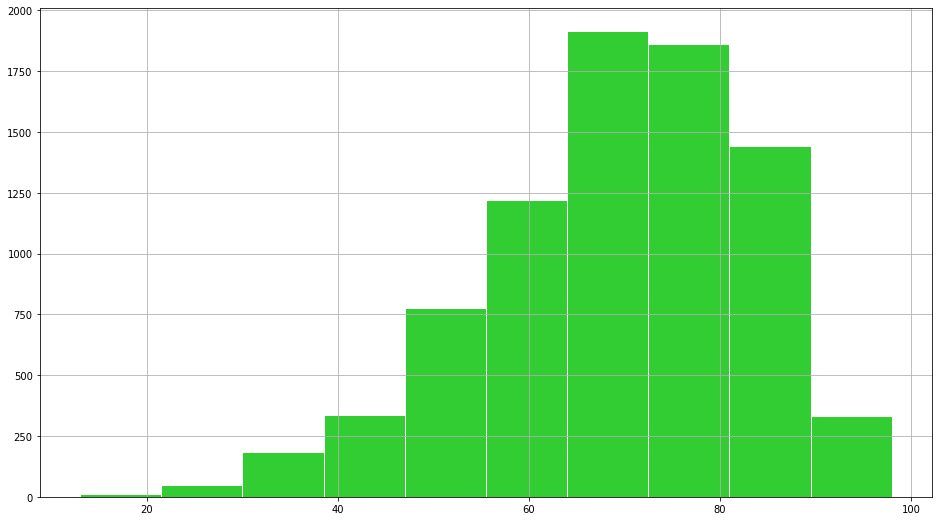

In [17]:
# способ 2 
# не трогаем подписи к осям

games["Critic_Score"].hist(figsize = (16, 9), color = "limegreen", edgecolor = "white");

**Способ 3 (много возможностей для настройки)** 

Самый универсальный способ создания графиков, не только гистограмм – создать график с помощью модуля `pyplot` из библиотеки `matplotlib` (его элементы встроены в `pandas`, но иногда их недостаточно). Импортируем его с сокращенным названием `plt`:

In [18]:
from matplotlib import pyplot as plt

Вообще график `matplotlib` состоит из двух частей:

* «рамка» для картинки (обычно сохраняется в переменную `fig`);
* поле с осями, внутри которого строится график (обычно сохраняется в переменную `ax`).

Так, мы можем воспользоваться функцией `subplots()` и сообщить Python, что мы хотим получить картинку размера 16 на 9 дюймов с разрешением 300 точек на дюйм (`dpi` – *dots per inch*):

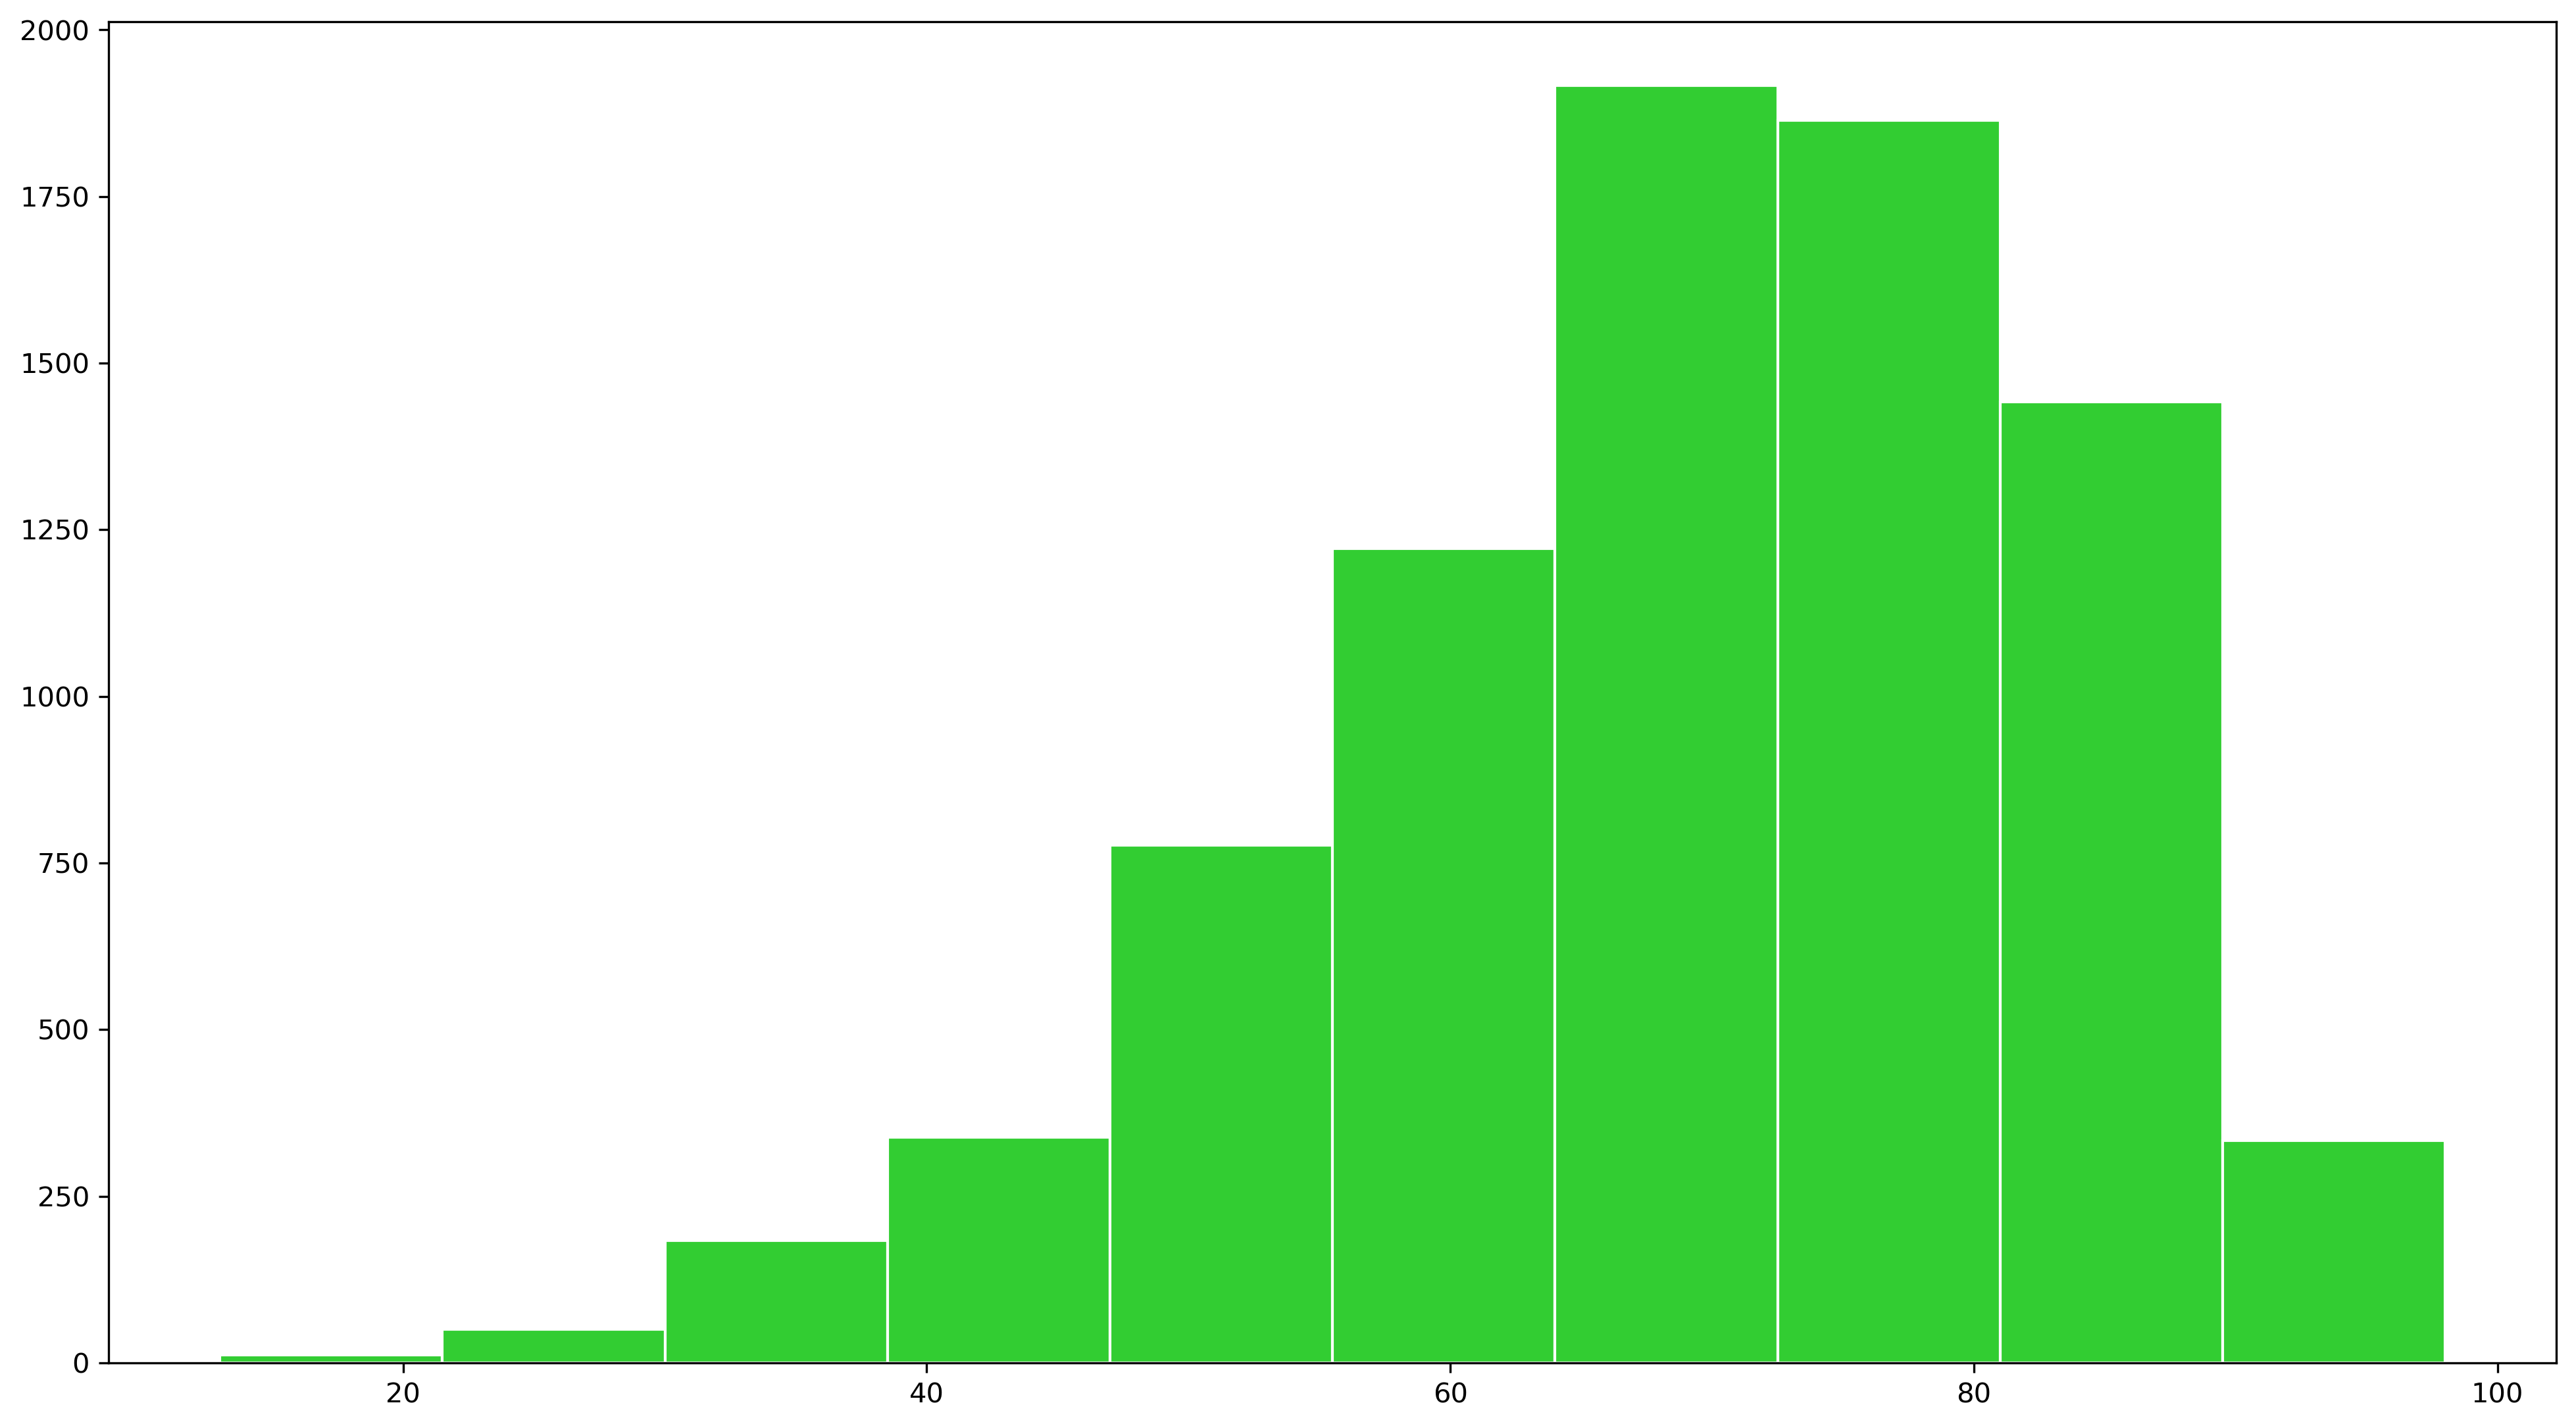

In [19]:
fig, ax = plt.subplots(figsize = (16, 9), dpi = 300)

# теперь к ax применяем hist() как метод
# применяем ее к столбцу, выбираемому из games

ax.hist(games["Critic_Score"], color = "limegreen", edgecolor= "white");

Неформально, создавая `fig` мы резервируем место под картинку соответствующего размера, а затем проводим различные манипуляции с `ax`, чтобы внутри этого поля для картинки построить график, настроить подписи, оси и прочее. Соответственно, к `ax` мы будем применять различные методы, а по завершении работы сможем выгрузить объект `fig` в файл PNG или JPEG. Вообще функция `subplots()`, как следует из ее названия, может использоваться для построения сразу нескольких графиков, но у нас пока внутри `fig` будет один.

Теперь применим к `ax` методы для дополнительных настроек и выгрузим результат из `fig` в png-файл:

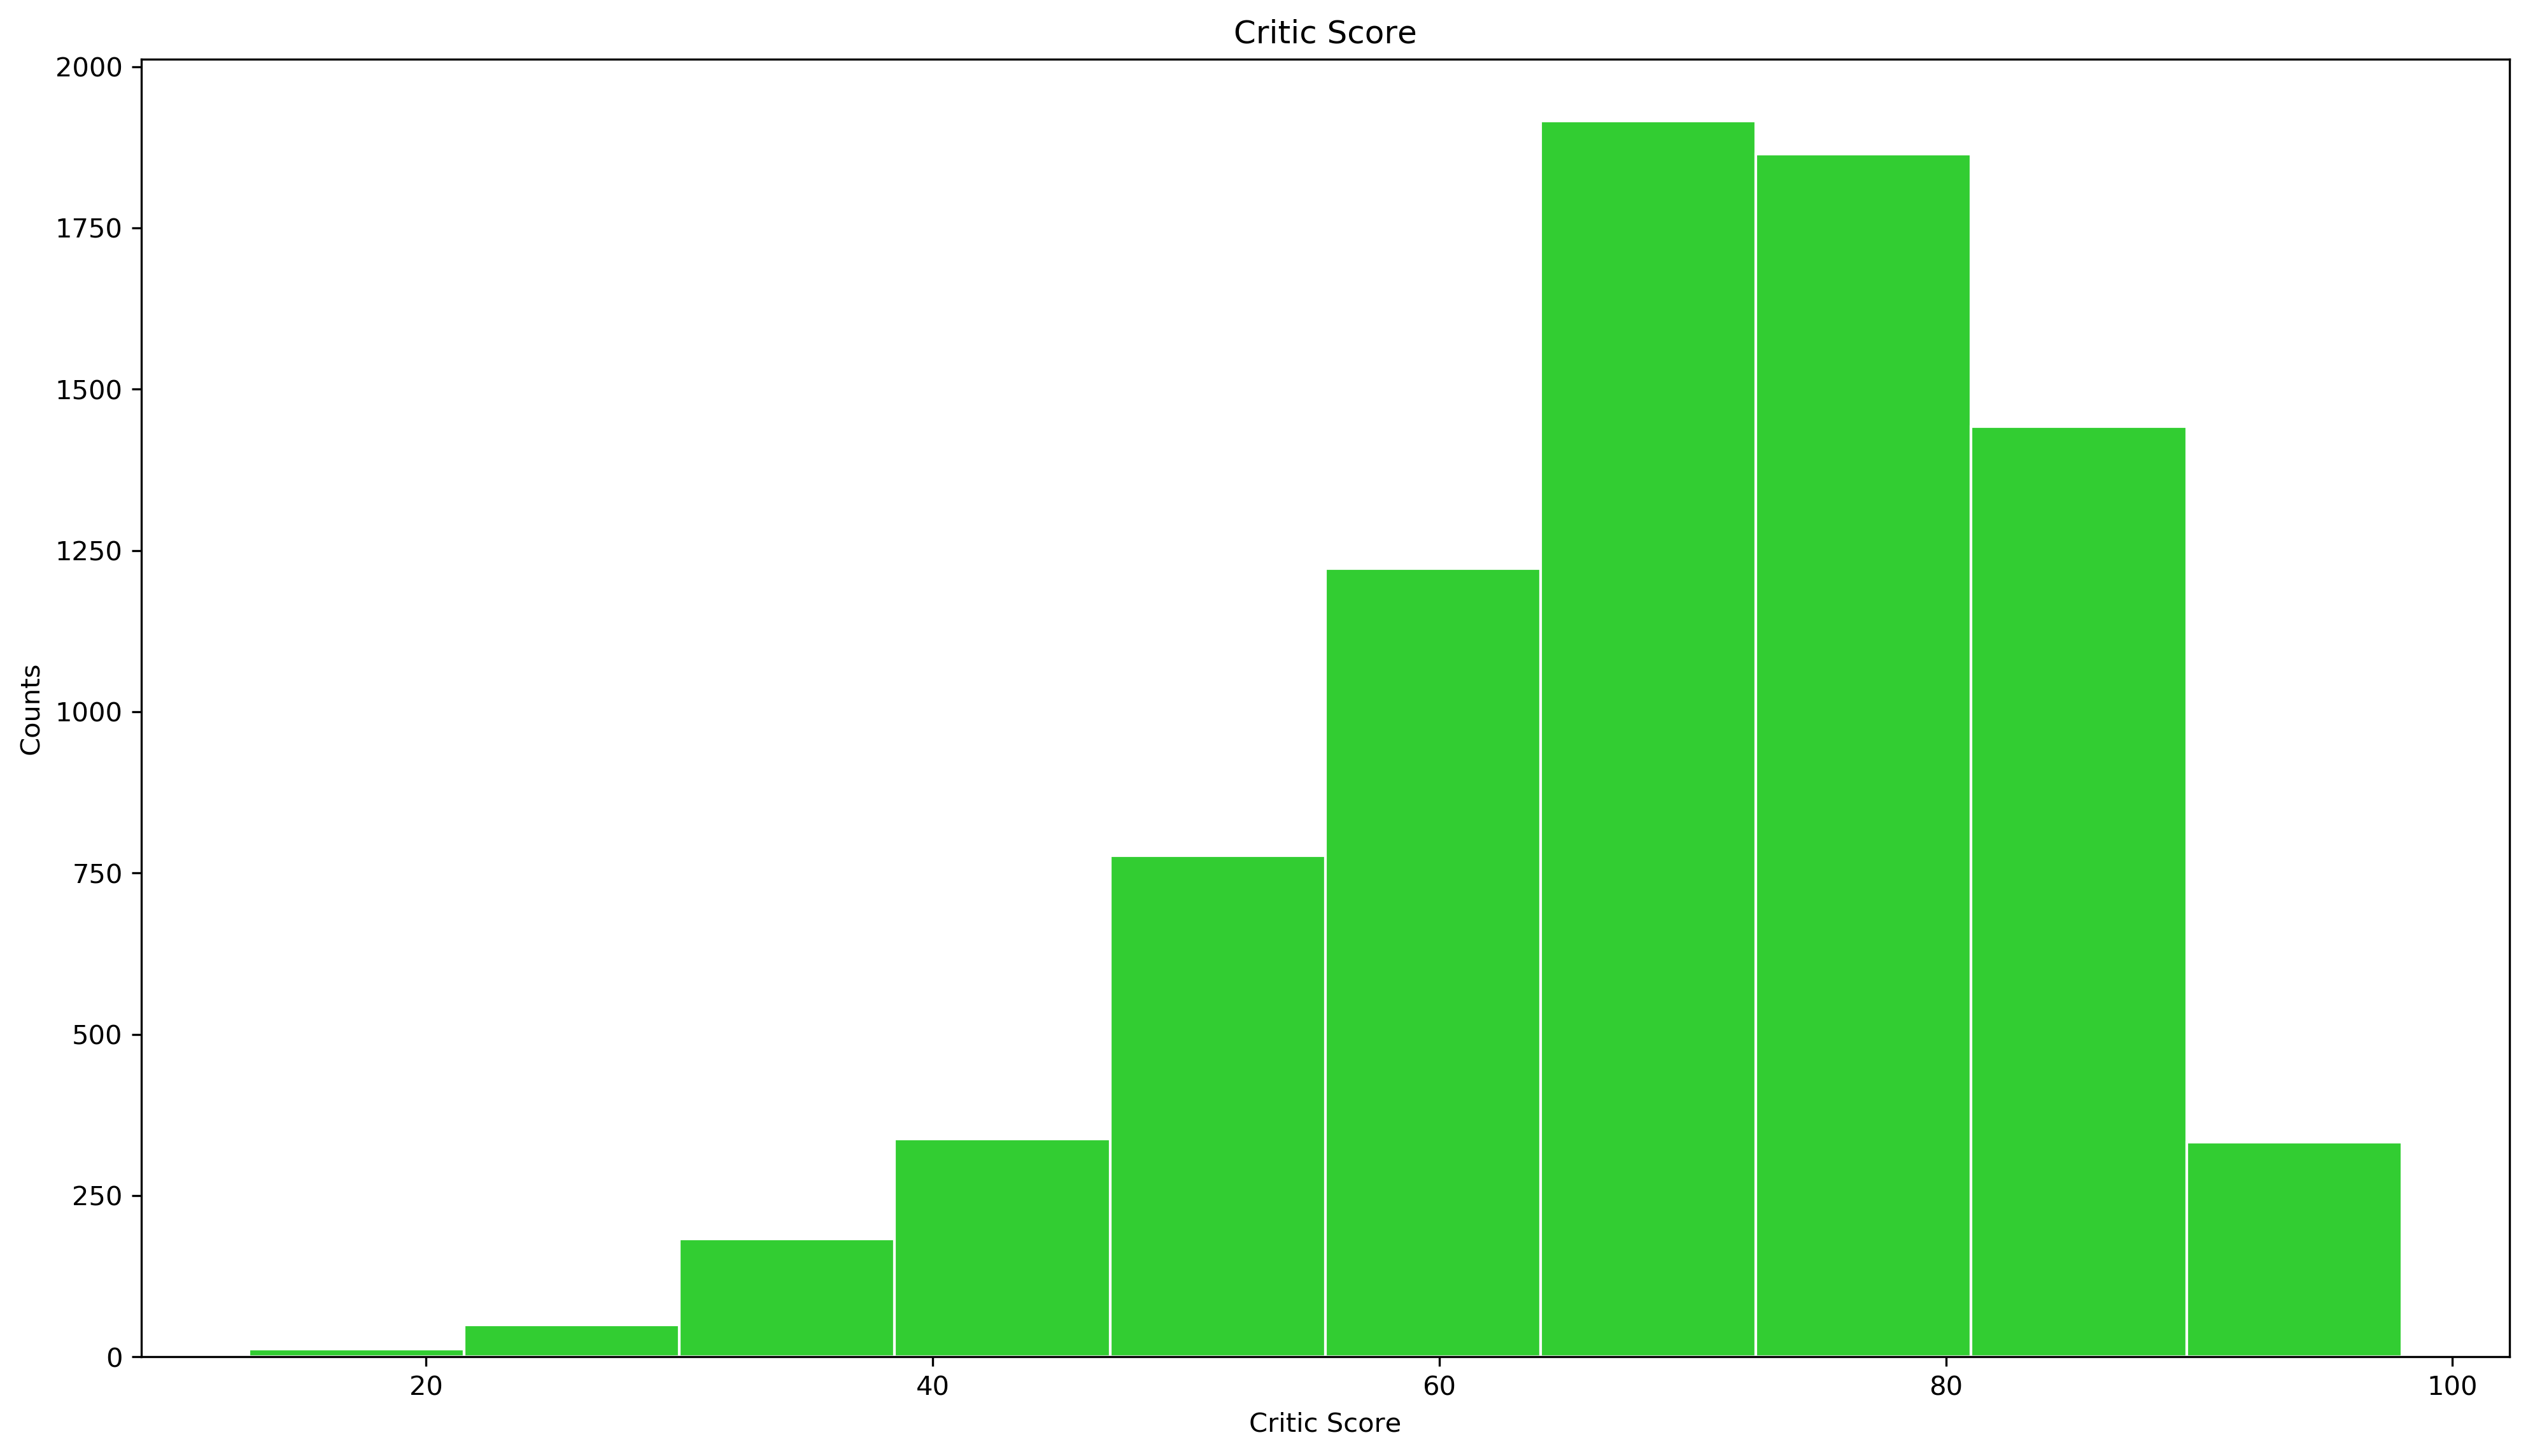

In [20]:
fig, ax = plt.subplots(figsize = (16, 9), dpi = 300)

ax.hist(games["Critic_Score"], color = "limegreen", edgecolor= "white");

# set_xlabel: подпись вдоль оси X
# set_ylabel: подпись вдоль оси Y
# set_title: добавляем заголовок

ax.set_xlabel("Critic Score");
ax.set_ylabel("Counts");
ax.set_title("Critic Score");

# метод savefig() применяем уже к fig
# в скобках – название файла

fig.savefig("score_hist.png")

Для желающих – ещё больше настроек:

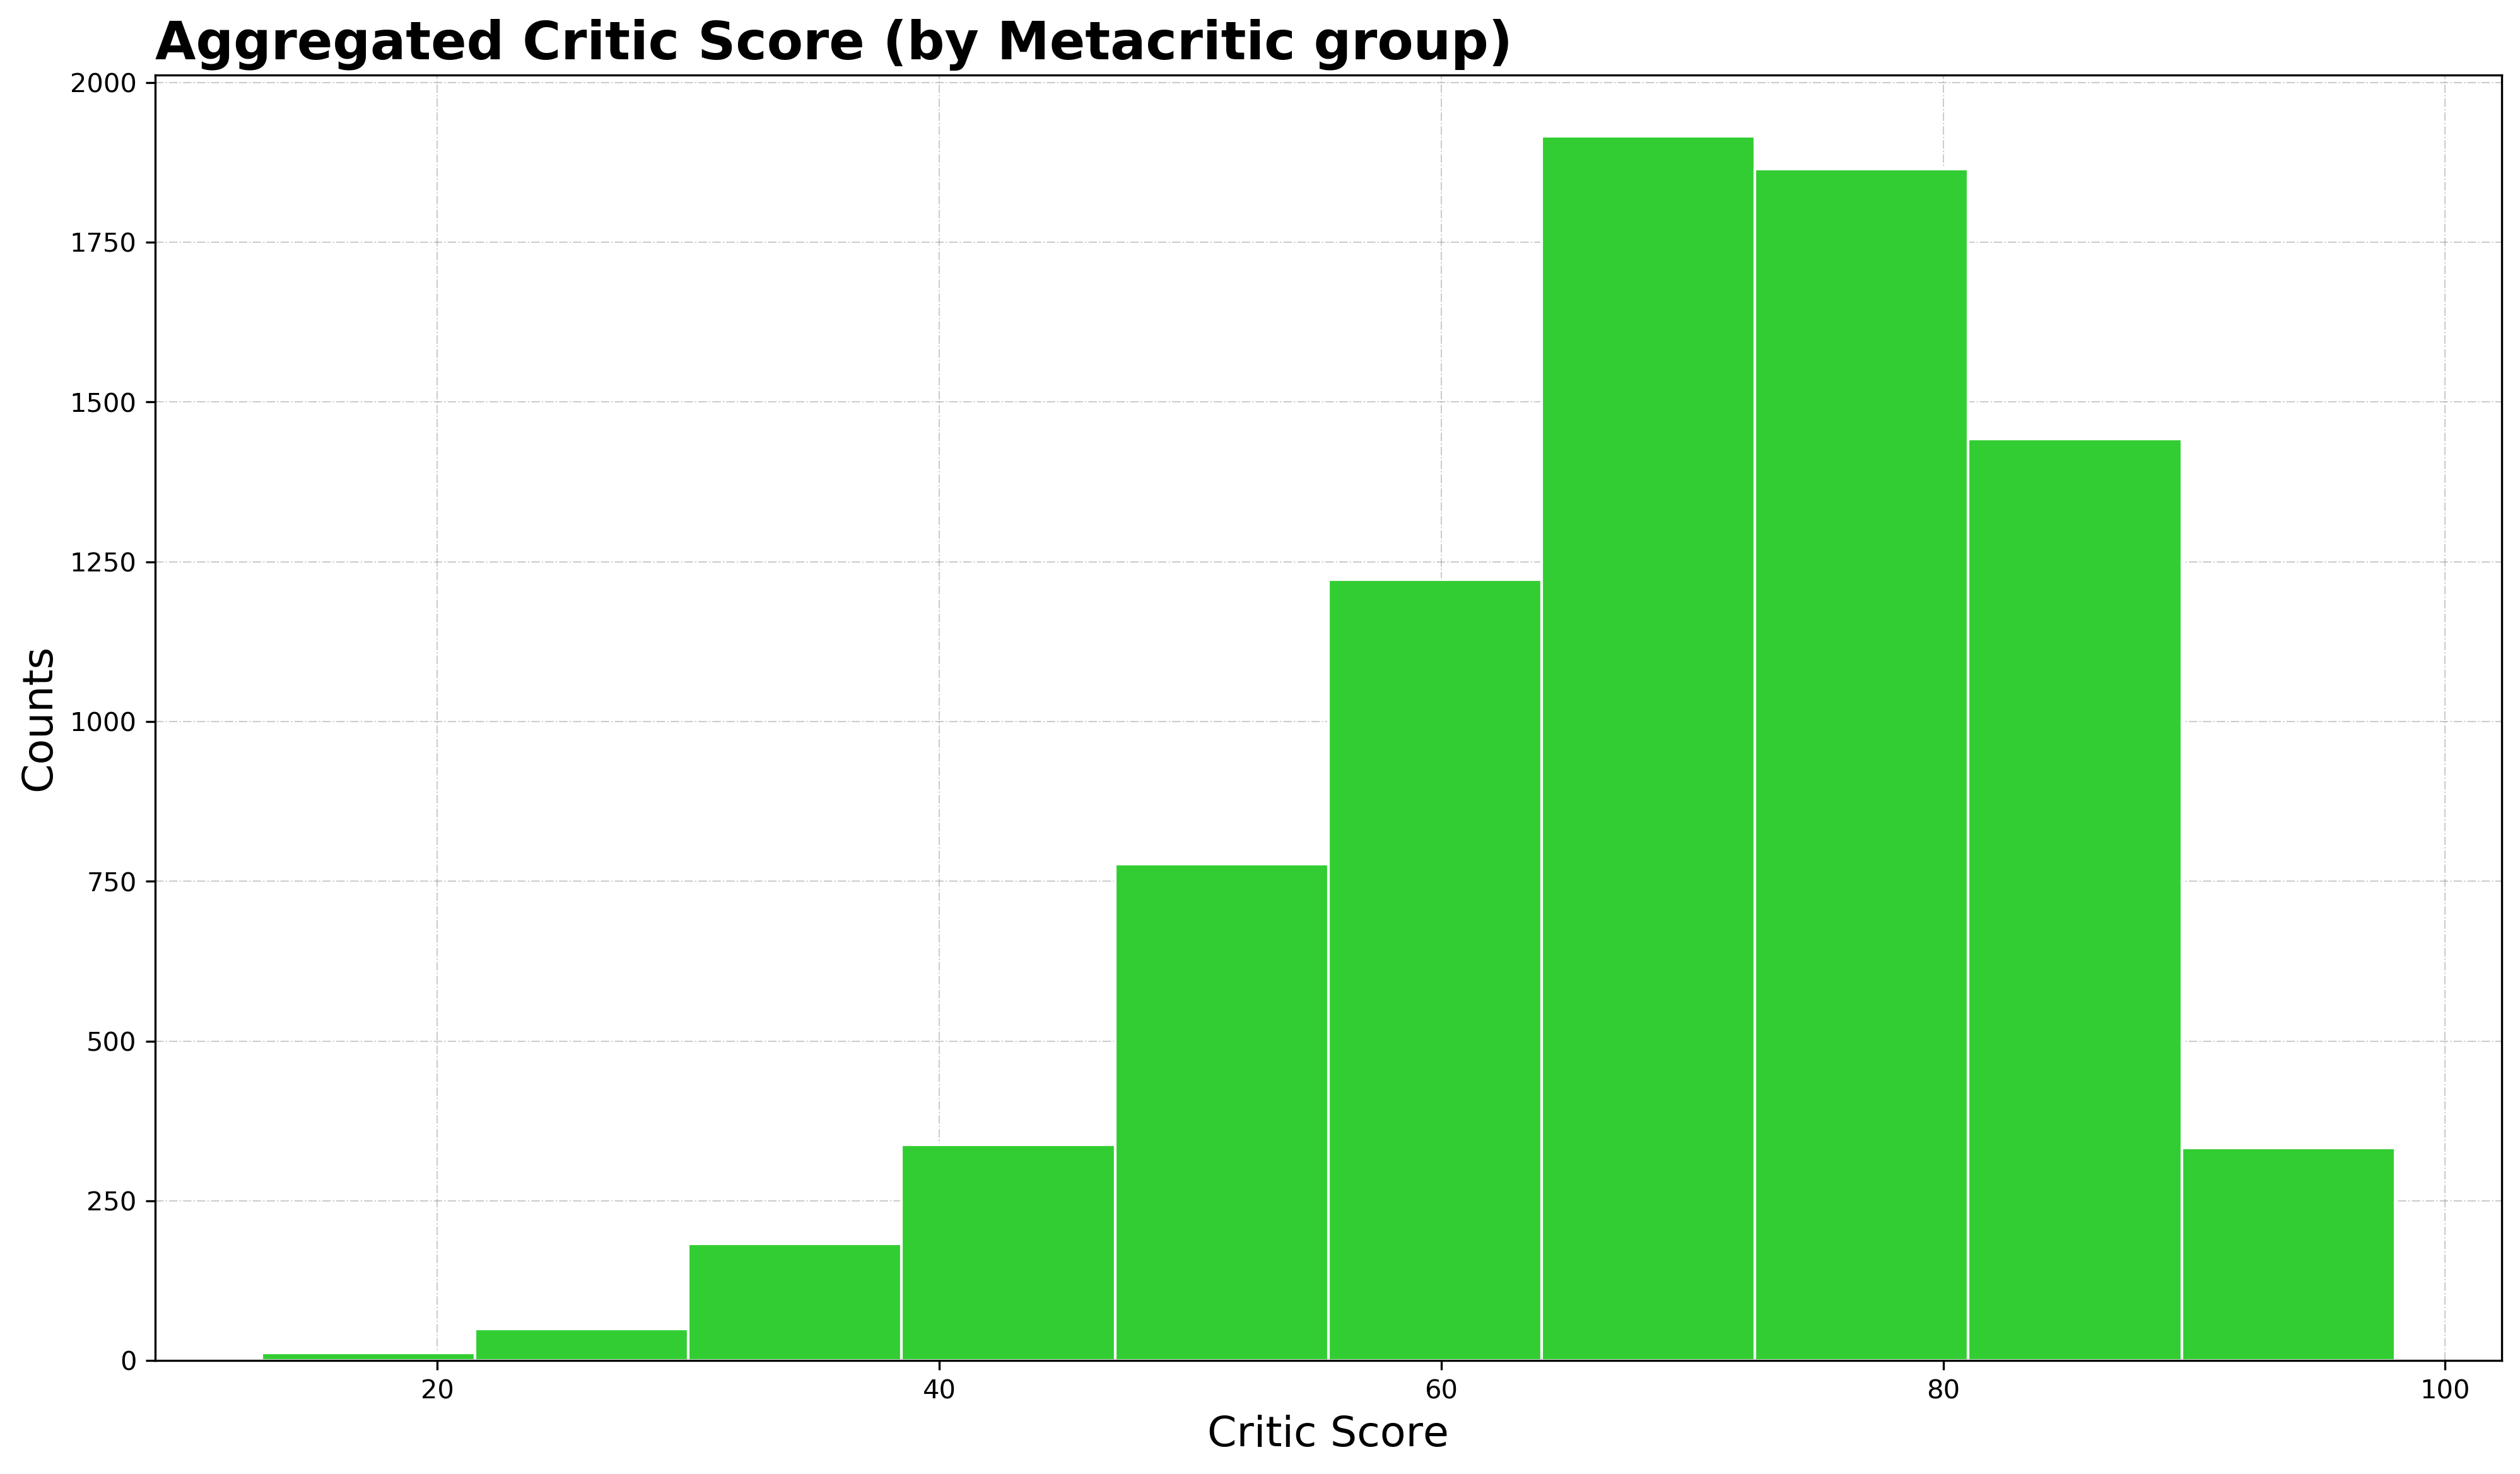

In [21]:
fig, ax = plt.subplots(figsize = (16, 9), dpi = 300)

ax.hist(games["Critic_Score"], color = "limegreen", edgecolor= "white");

# меняем размер шрифта и начертание
# аргумент fontsize: размер шрифта
# аргумент fontweight: начертание шрифта
# аргумент loc: положение подписи (для заголовка)

ax.set_xlabel("Critic Score", fontsize = 16);
ax.set_ylabel("Counts", fontsize = 16);
ax.set_title("Aggregated Critic Score (by Metacritic group)", 
             fontsize = 20, 
             fontweight = "semibold", 
             loc = "left");

# метод grid(): добавляем сетку
# color – цвет сетки
# linestyle – тип линии
# linewidth – толщина линии
# alpha – прозрачность

# метод set_axisbelow(): убираем сетку под график
# чтобы не перекрывала график

ax.set_axisbelow(True)
ax.grid(color ='grey', linestyle = '-.', linewidth = 0.5, alpha = 0.4);

fig.savefig("score_hist2.png")